# Example notebook for cyclic groups
Let $n \in \mathbb N$. Let  $G = C_n = <\{z\}, z^n=1>$ be a cyclic group. This is the most trivial example possible - just **one** generator and 1 dimensional irreducable representations.

## Expirimential setup
- python scypy za numerične račune in sympy za simbolno - Mathemathica ni scalable in nagaja na mojem ubogem laptopu
- TODO: iz grupe zgeneriraj sympy loss, odvajaj, zgeneriraj loss funkcijo, poženi odeint

In [2]:
# TODO define groups, itd....
G = None

Below are losses for cyclic groups. The only parameter is $z = x + iy \in \mathbb C$.
$$
\mathcal L_r(z) = |z^n -1|^2 = (x^3−3xy^2)^2+(3x^2y−y^3)^2
$$

In [3]:
# define loss and get its derivative

import sympy
from sympy.functions.elementary.complexes import Abs

x, y = sympy.symbols("x y", real=True)

z = x + sympy.I * y
L_rel = (Abs(z**3 -1)**2).expand()

abs_z_squared = x**2 + y**2



L_unit = (x **2 + y ** 2 -1) ** 2
L_irr = ( 1/3 * (1 + abs_z_squared + abs_z_squared ** 2)  -1 ) ** 2

L = L_rel + L_unit + L_irr
L


x**6 + 3*x**4*y**2 - 2*x**3 + 3*x**2*y**4 + 6*x*y**2 + y**6 + (x**2 + y**2 - 1)**2 + 0.444444444444445*(0.5*x**2 + 0.5*y**2 + 0.5*(x**2 + y**2)**2 - 1)**2 + 1

In [4]:
# odvoda
L_x = sympy.diff(L, x)
L_y = sympy.diff(L, y)
L_x

6*x**5 + 12*x**3*y**2 - 6*x**2 + 6*x*y**4 + 4*x*(x**2 + y**2 - 1) + 6*y**2 + 0.444444444444445*(4.0*x*(x**2 + y**2) + 2.0*x)*(0.5*x**2 + 0.5*y**2 + 0.5*(x**2 + y**2)**2 - 1)

In [5]:
# symbolic loss to function
loss = sympy.lambdify((x, y), L)
loss_x = sympy.lambdify((x, y), L_x)
loss_y = sympy.lambdify((x, y), L_y)


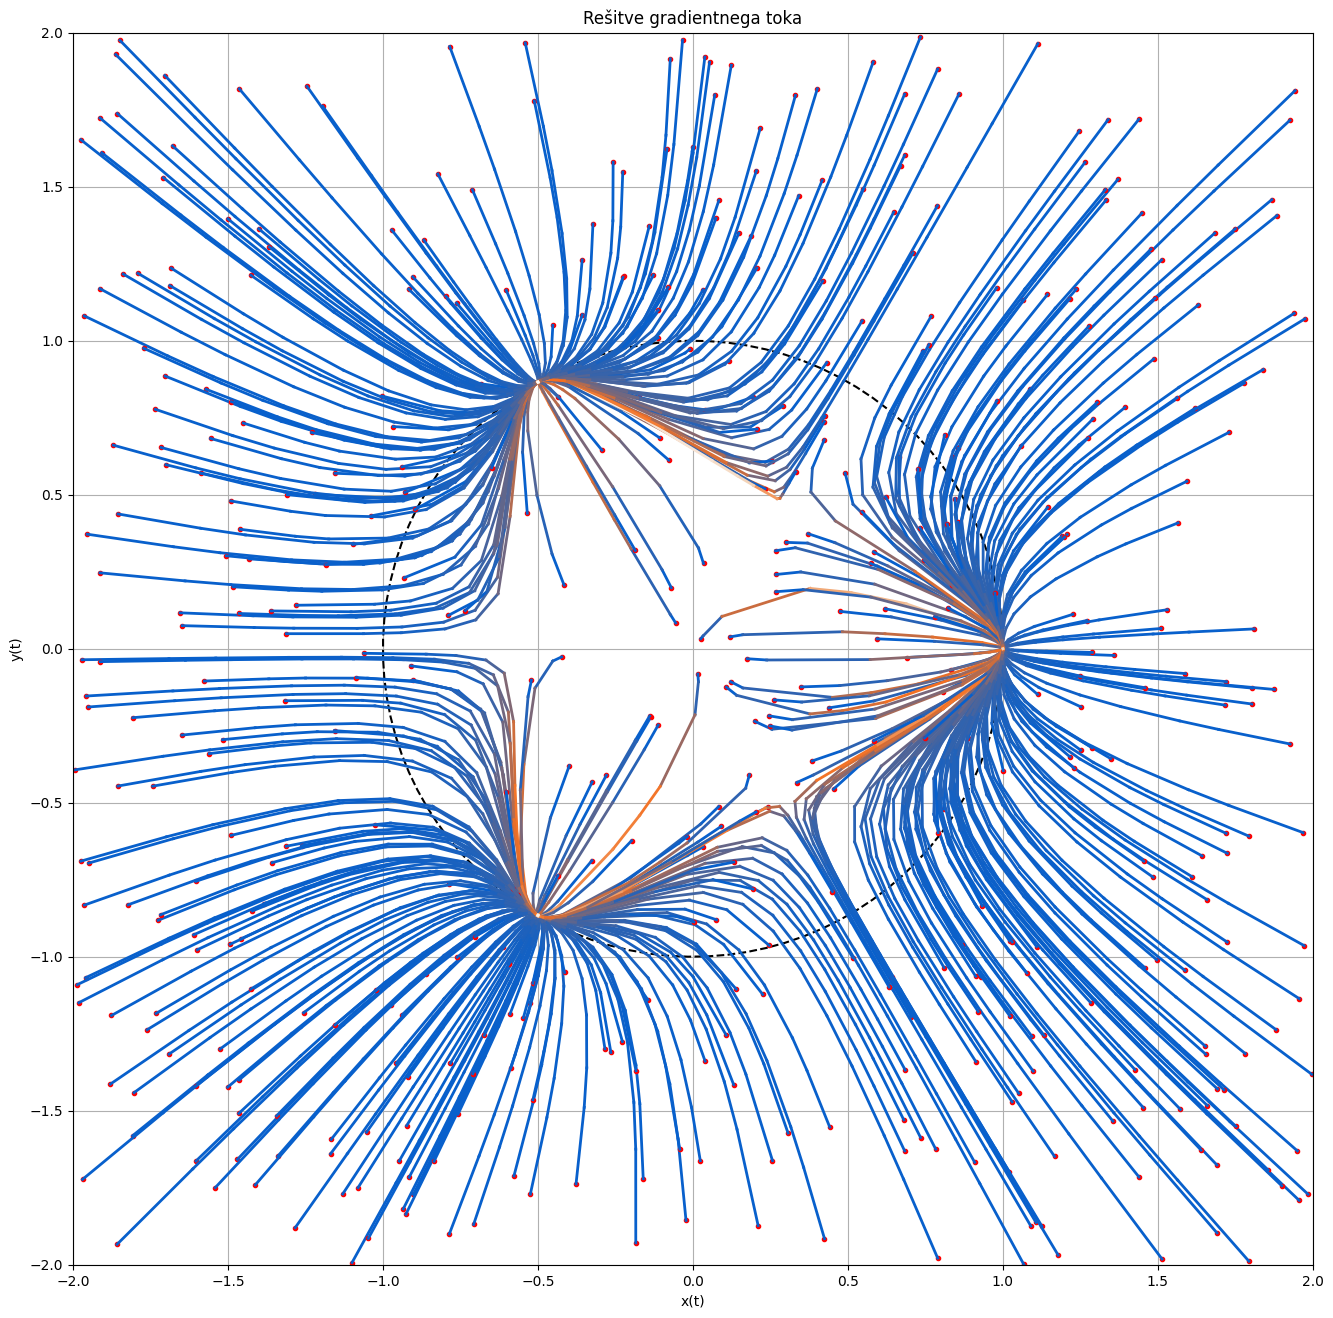

In [11]:
# example of one trajectory

from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
from gofi.plot.colors import cmap_blue_orange_blackless
# sollve d(x,y)/dt = -gradL
def neg_grad(t, z):
    x, y = z
    return -loss_x(x, y), -loss_y(x, y)

t_max =1


# Plot the solution in 2D (y vs x)
plt.figure(figsize=(16, 16))
# fix axes to show the unit circle
# plot the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'k--', label='Unit Circle')
# plot the  


ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])

sample_size = 500
for i in range(sample_size):
    x0, y0 = np.random.uniform(-2, 2, 2)
    solution = solve_ivp(neg_grad, (0, t_max), (x0, y0))

   # cmap = plt.get_cmap('viridis')
    cmap = cmap_blue_orange_blackless
    norm = plt.Normalize(vmin=0, vmax=t_max)  # Normalize based on time range
    # plot initial step
    plt.plot(solution.y[0][0], solution.y[1][0], 'ro', label='Initial point', markersize=3)


    # Plot the solution in 2D (y vs x) with color changing over time
    for i in range(len(solution.t) - 1):
        plt.plot(solution.y[0][i:i+2], solution.y[1][i:i+2], color=cmap(norm(solution.t[i])), lw=2)#, marker= '>')
    #plt.plot(solution.y[0], solution.y[1], label='Gradient flow trajectory')



plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Rešitve gradientnega toka') 
plt.grid(True)
plt.savefig('C3 trajektorije.pdf')
plt.show()

In [7]:
import numpy as np
from tqdm import tqdm
# get grid
resolution = 500
t_max = 1
min_param = -2
max_param = 2

x = np.linspace(-2, 2, resolution)
y = np.linspace(-2, 2, resolution)
x, y = np.meshgrid(x, y)

grid = np.zeros((resolution, resolution, 1))

for index, (x0, y0) in tqdm(enumerate(zip(x.flatten(), y.flatten())) , total=resolution ** 2):
    solution = solve_ivp(neg_grad, (0, t_max), (x0, y0))

    grid[index // resolution][index % resolution] = np.degrees(np.arctan2(solution.y[1][-1], solution.y[0][-1]))





    

  0%|          | 42/250000 [00:00<22:09, 188.03it/s]

  2%|▏         | 4507/250000 [00:24<22:11, 184.34it/s]


KeyboardInterrupt: 

In [ ]:
#recolor the grid
def extract_color(z):
    mask = np.array([0, 120, -120])
    differences = (mask - z)**2
    return float(np.argmin(differences))

color_values = np.apply_along_axis(extract_color, 2, grid)
#color_values = np.reshape(color_values, (color_values.shape[0], color_values.shape[1], 1))

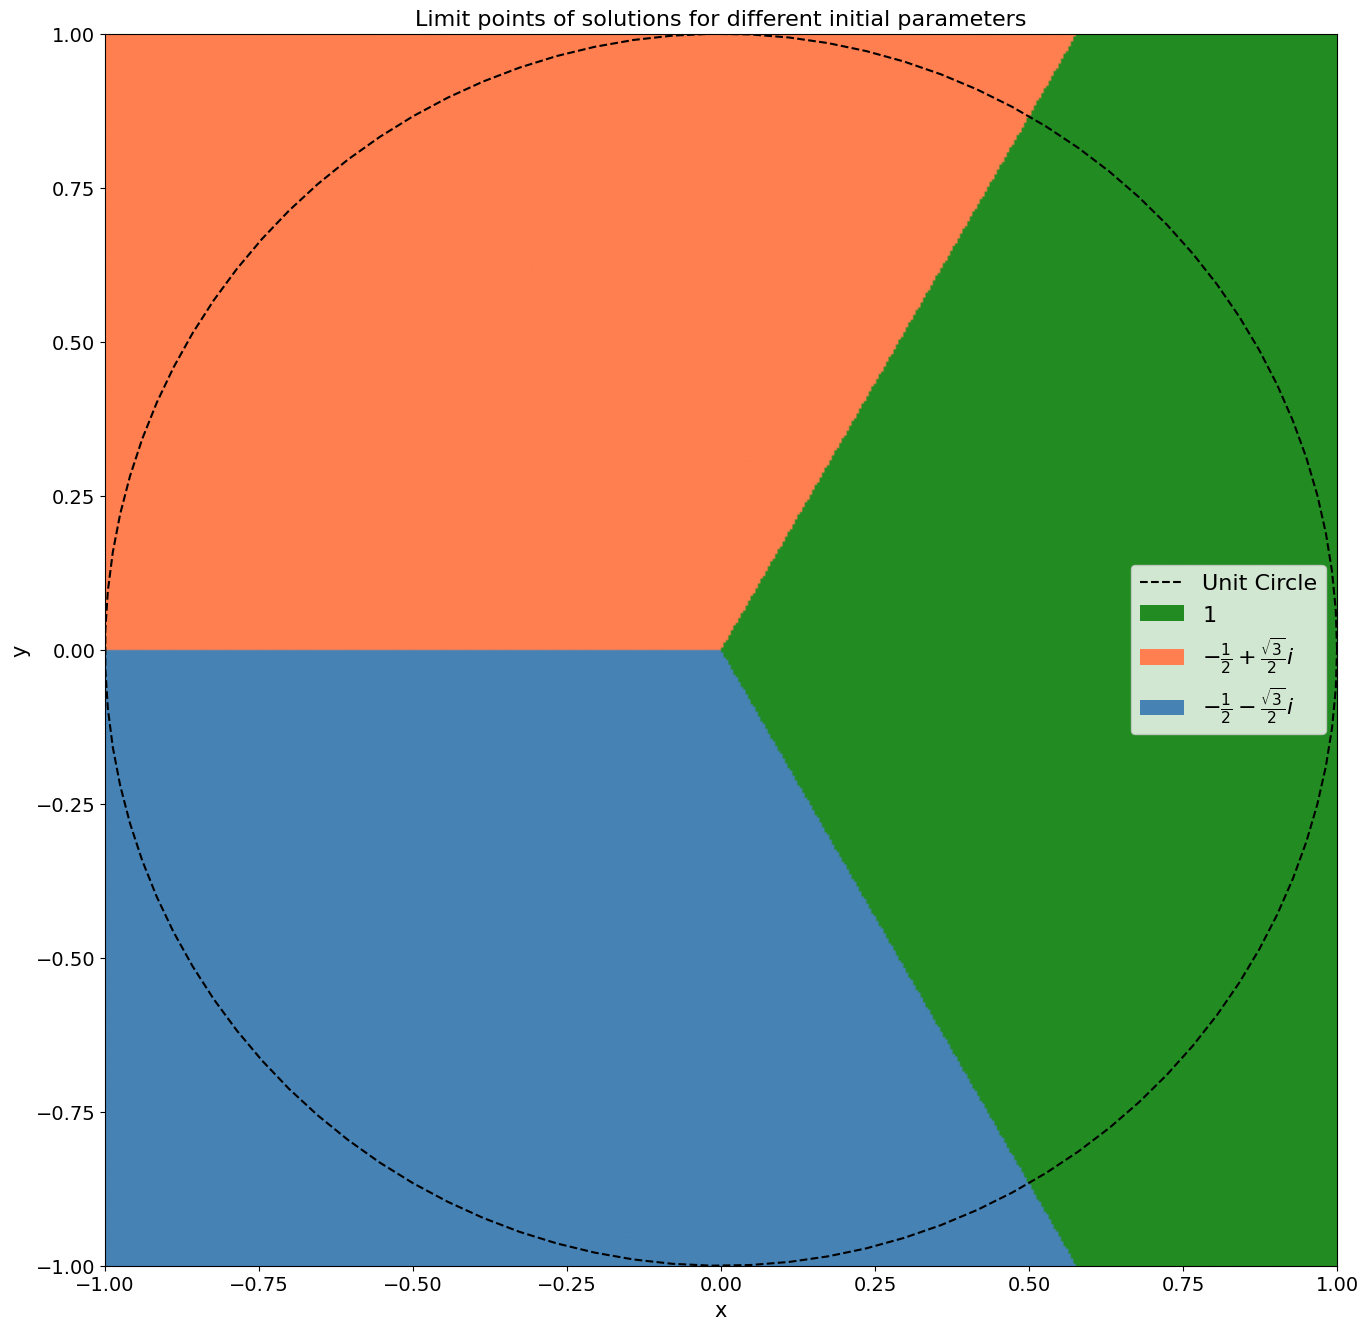

In [ ]:
plt.figure(figsize=(16, 16))
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch



color1 = 'forestgreen'
color2 = 'coral'
color3 = 'steelblue'
colors = [color1, color2, color3]  # map 1→red, 2→green, 3→blue
cmap = ListedColormap(colors)
# plot the grid
plt.imshow(color_values, cmap=cmap, extent=(min_param, max_param, min_param, max_param), origin='lower')


legend_elements = [
    Patch(facecolor=color1, label=r'$1$'),
    Patch(facecolor=color2, label=r'$-\frac{1}{2} + \frac{\sqrt{3}}{2}i$'),
    Patch(facecolor=color3, label=r'$-\frac{1}{2} - \frac{\sqrt{3}}{2}i$')
]


#plt.legend(handles=[red_patch, blue_patch])

# plot the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'k--', label='Unit Circle')
#plt.legend(handles=legend_elements, loc='lower right')
auto_handles, auto_labels = plt.gca().get_legend_handles_labels()

# Combine and pass to legend
all_handles = auto_handles + legend_elements
all_labels = auto_labels + [h.get_label() for h in legend_elements]
plt.legend(all_handles, all_labels, fontsize=16)


plt.title('Limit points of solutions for different initial parameters', fontsize=16)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


3D visualisation of loss:

In [ ]:

# uncomment this for interactive plotting
#%matplotlib ipympl


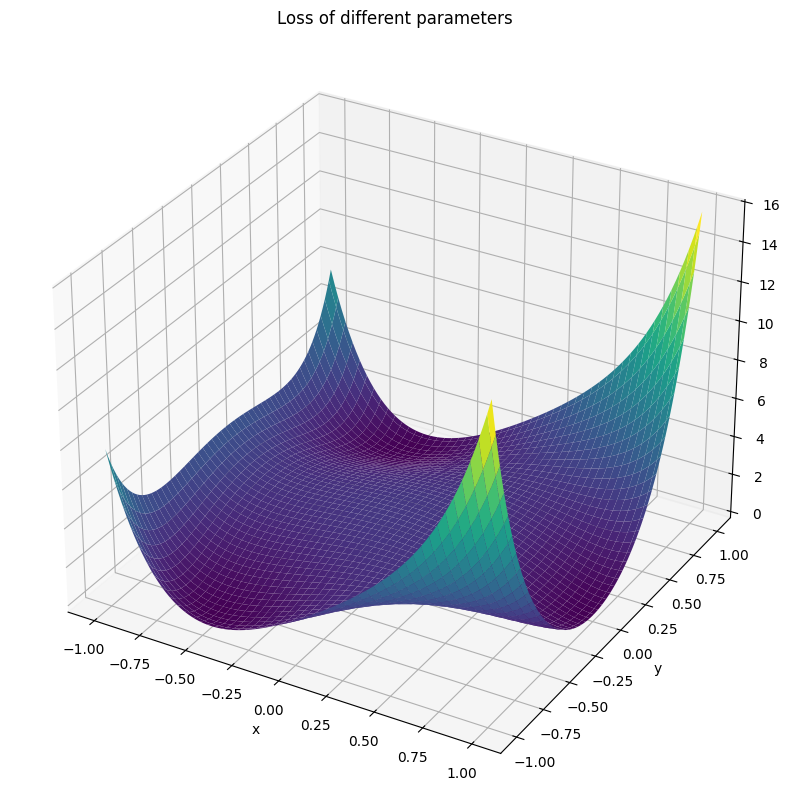

In [ ]:


resolution = 100
min_param = -1
max_param = 1
x = np.linspace(min_param, max_param, resolution)
y = np.linspace(min_param, max_param, resolution)
x, y = np.meshgrid(x, y)
z = loss(x,y)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')

#zero_grad = [[-0.5, -0.866025], [1.0, 0.0], [0.278051, 0.481598], [-0.556102, 0.0], [-0.5, 0.866025], [0.278051, -0.481598], [0.0, 0.0]]
#for x, y in zero_grad:
#    ax.plot3D(x,y, loss(x,y), 'rx', label='Zero gradient', markersize=10)

ax.set_xlabel('x')
ax.set_ylabel('y')
# ax.set_zlabel('Loss')
ax.set_title('Loss of different parameters')


plt.show()

This is expected behaviour. Export loss to latex:

In [ ]:
#%matplotlib inline

In [ ]:
from sympy.printing.mathematica import mathematica_code
print(mathematica_code(L))
print(mathematica_code(L_x))
print(mathematica_code(L_y))

x^6 + 3*x^4*y^2 - 2*x^3 + 3*x^2*y^4 + 6*x*y^2 + y^6 + (x^2 + y^2 - 1)^2 + 0.444444444444445*(0.5*x^2 + 0.5*y^2 + 0.5*(x^2 + y^2)^2 - 1)^2 + 1
6*x^5 + 12*x^3*y^2 - 6*x^2 + 6*x*y^4 + 4*x*(x^2 + y^2 - 1) + 6*y^2 + 0.444444444444445*(4.0*x*(x^2 + y^2) + 2.0*x)*(0.5*x^2 + 0.5*y^2 + 0.5*(x^2 + y^2)^2 - 1)
6*x^4*y + 12*x^2*y^3 + 12*x*y + 6*y^5 + 4*y*(x^2 + y^2 - 1) + 0.444444444444445*(4.0*y*(x^2 + y^2) + 2.0*y)*(0.5*x^2 + 0.5*y^2 + 0.5*(x^2 + y^2)^2 - 1)


>>> NSolve[{Lx == 0, Ly == 0}, {x, y}, Reals]

    {{x -> -0.5, y -> -0.866025}, {x -> 1., y -> 0.}, {x -> 0.278051, 
    y -> 0.481598}, {x -> -0.556102, y -> 0.}, {x -> -0.5, 
    y -> 0.866025}, {x -> 0.278051, y -> -0.481598}, {x -> 0., y -> 0.}}

Plot from points of zero grad:

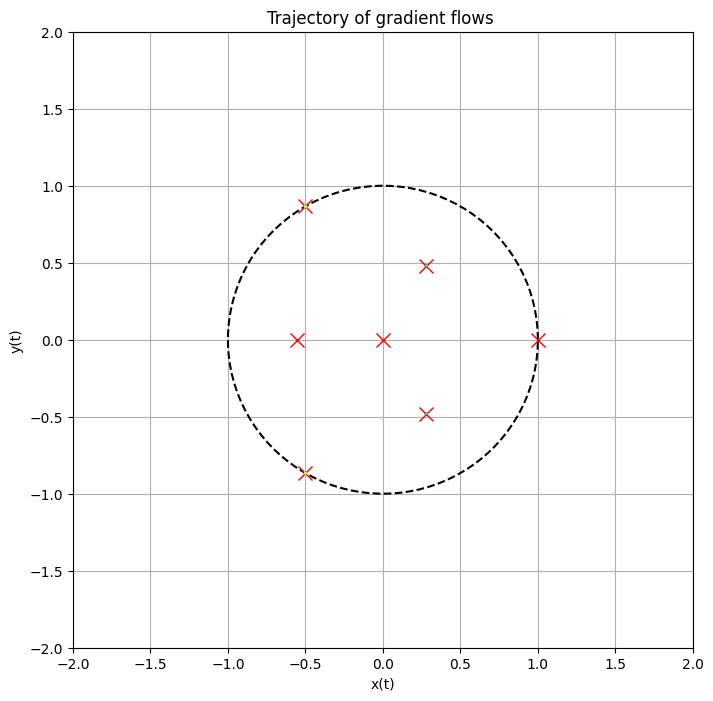

In [ ]:
t_max =1
zero_grad = [[-0.5, -0.866025], [1.0, 0.0], [0.278051, 0.481598], [-0.556102, 0.0], [-0.5, 0.866025], [0.278051, -0.481598], [0.0, 0.0]]


# Plot the solution in 2D (y vs x)
plt.figure(figsize=(8, 8))
# fix axes to show the unit circle
# plot the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'k--', label='Unit Circle')
# plot the  

for (x,y) in zero_grad:
    
    solution = solve_ivp(neg_grad, (0, t_max), (x, y))

    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(vmin=0, vmax=t_max)  # Normalize based on time range
    # plot initial step
    plt.plot(solution.y[0][0], solution.y[1][0], 'rx', label='Initial point', markersize=10)


    # Plot the solution in 2D (y vs x) with color changing over time
    for i in range(len(solution.t) - 1):
        plt.plot(solution.y[0][i:i+2], solution.y[1][i:i+2], color=cmap(norm(solution.t[i])), lw=2)#, marker= '>')


ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Trajectory of gradient flows ') 
plt.grid(True)
plt.show()

Points near zero grad:

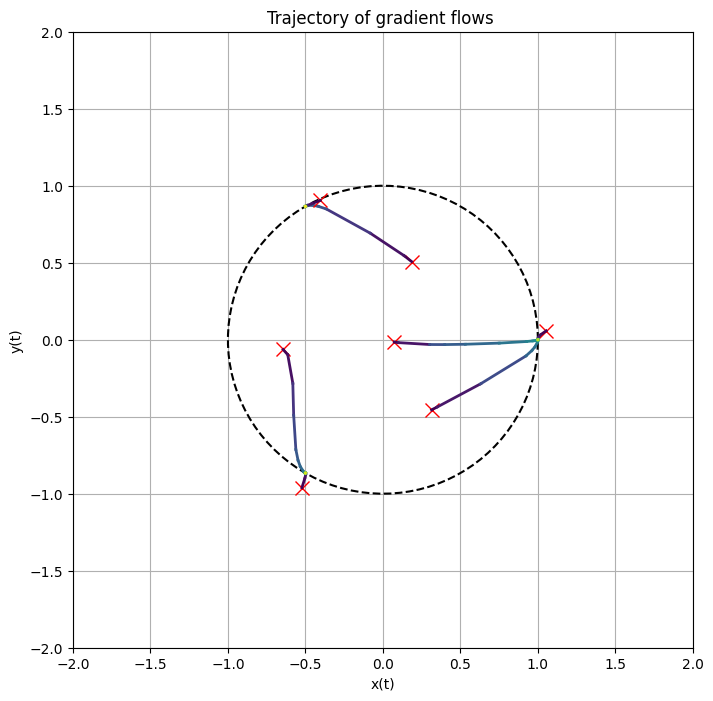

In [ ]:
t_max =1
eps = 0.1
zero_grad = [[-0.5, -0.866025], [1.0, 0.0], [0.278051, 0.481598], [-0.556102, 0.0], [-0.5, 0.866025], [0.278051, -0.481598], [0.0, 0.0]]


# Plot the solution in 2D (y vs x)
plt.figure(figsize=(8, 8))
# fix axes to show the unit circle
# plot the unit circle
plt.plot(np.cos(np.linspace(0, 2 * np.pi, 100)), np.sin(np.linspace(0, 2 * np.pi, 100)), 'k--', label='Unit Circle')
# plot the  

for (x,y) in zero_grad:
    
    # perturb the initial point
    x += np.random.uniform(-eps, eps)
    y += np.random.uniform(-eps, eps)

    solution = solve_ivp(neg_grad, (0, t_max), (x, y))

    cmap = plt.get_cmap('viridis')
    norm = plt.Normalize(vmin=0, vmax=t_max)  # Normalize based on time range
    # plot initial step
    plt.plot(solution.y[0][0], solution.y[1][0], 'rx', label='Initial point', markersize=10)


    # Plot the solution in 2D (y vs x) with color changing over time
    for i in range(len(solution.t) - 1):
        plt.plot(solution.y[0][i:i+2], solution.y[1][i:i+2], color=cmap(norm(solution.t[i])), lw=2)#, marker= '>')


ax = plt.gca()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title('Trajectory of gradient flows ') 
plt.grid(True)
plt.show()